## 라이브러리

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import os
import tensorflow as tf

## Matplotlib 한글 글꼴

In [26]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## Data_csv

In [27]:
df = pd.read_excel("C:/Users/kowm6/OneDrive - 전주대학교/활동 내역/공무원 근무 환경에 대한 데이터 분석_김영수교수님_230216시작/데이터/DATA.xlsx")

## Check

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   성별         4133 non-null   int64  
 1   연령         4133 non-null   int64  
 2   혼인상태       4133 non-null   int64  
 3   학력_입직당시    4133 non-null   int64  
 4   학력_현재      4133 non-null   int64  
 5   입직준비기간     4133 non-null   int64  
 6   재직기간       4133 non-null   int64  
 7   입지채용방식     4133 non-null   int64  
 8   직급_입직당시    4133 non-null   int64  
 9   직급_현재      4133 non-null   int64  
 10  총근무시간      4133 non-null   int64  
 11  시간외근무      4133 non-null   int64  
 12  기관구분       4133 non-null   int64  
 13  기관유형       4133 non-null   int64  
 14  이직의도       4133 non-null   int64  
 15  자원제공만족도    4133 non-null   float64
 16  업무자율성      4133 non-null   float64
 17  가족친화제도만족도  3002 non-null   float64
 18  원격근무만족도    3380 non-null   float64
 19  채용공정성      4133 non-null   float64
 20  배치전환적절성 

In [29]:
df.columns

Index(['성별', '연령', '혼인상태', '학력_입직당시', '학력_현재', '입직준비기간', '재직기간', '입지채용방식',
       '직급_입직당시', '직급_현재', '총근무시간', '시간외근무', '기관구분', '기관유형', '이직의도', '자원제공만족도',
       '업무자율성', '가족친화제도만족도', '원격근무만족도', '채용공정성', '배치전환적절성', '보수만족도', '복지만족도',
       '역량', '목표명확성', '리더십만족도', '변화관리', '의사소통', '업무성과', '공공봉사동기', '직무스트레스',
       '조직시민행동', '혁신행동', '공직가치', '조직몰입', '직무만족', '공직만족도', '삶의질', '조직문화',
       '승진공정성', '교육훈련'],
      dtype='object')

In [30]:
df['이직의도'].value_counts()

0    2679
1    1454
Name: 이직의도, dtype: int64

In [31]:
df.head(5)

,성별,연령,혼인상태,학력_입직당시,학력_현재,입직준비기간,재직기간,입지채용방식,직급_입직당시,직급_현재,...,조직시민행동,혁신행동,공직가치,조직몰입,직무만족,공직만족도,삶의질,조직문화,승진공정성,교육훈련
0,1,4,1,3,4,1,6,1,9,5,...,4.0,4.00,3.88,3.75,4.00,3.5,4.0,3.57,4.00,3.33
1,2,2,1,2,2,2,3,1,9,6,...,2.8,3.00,3.13,2.00,3.50,3.5,3.0,2.71,2.75,2.33
2,2,4,1,1,1,1,6,2,9,7,...,3.4,3.00,3.38,4.00,4.00,4.0,3.5,4.00,2.75,3.00
3,1,4,1,3,3,2,6,1,9,5,...,4.2,4.25,4.63,4.00,4.00,4.0,3.0,3.71,3.00,3.67
4,1,3,1,3,3,3,4,1,7,5,...,4.2,4.50,4.50,4.75,4.75,4.0,4.0,4.71,5.00,5.00


## 데이터 간의 상관도

<AxesSubplot:>

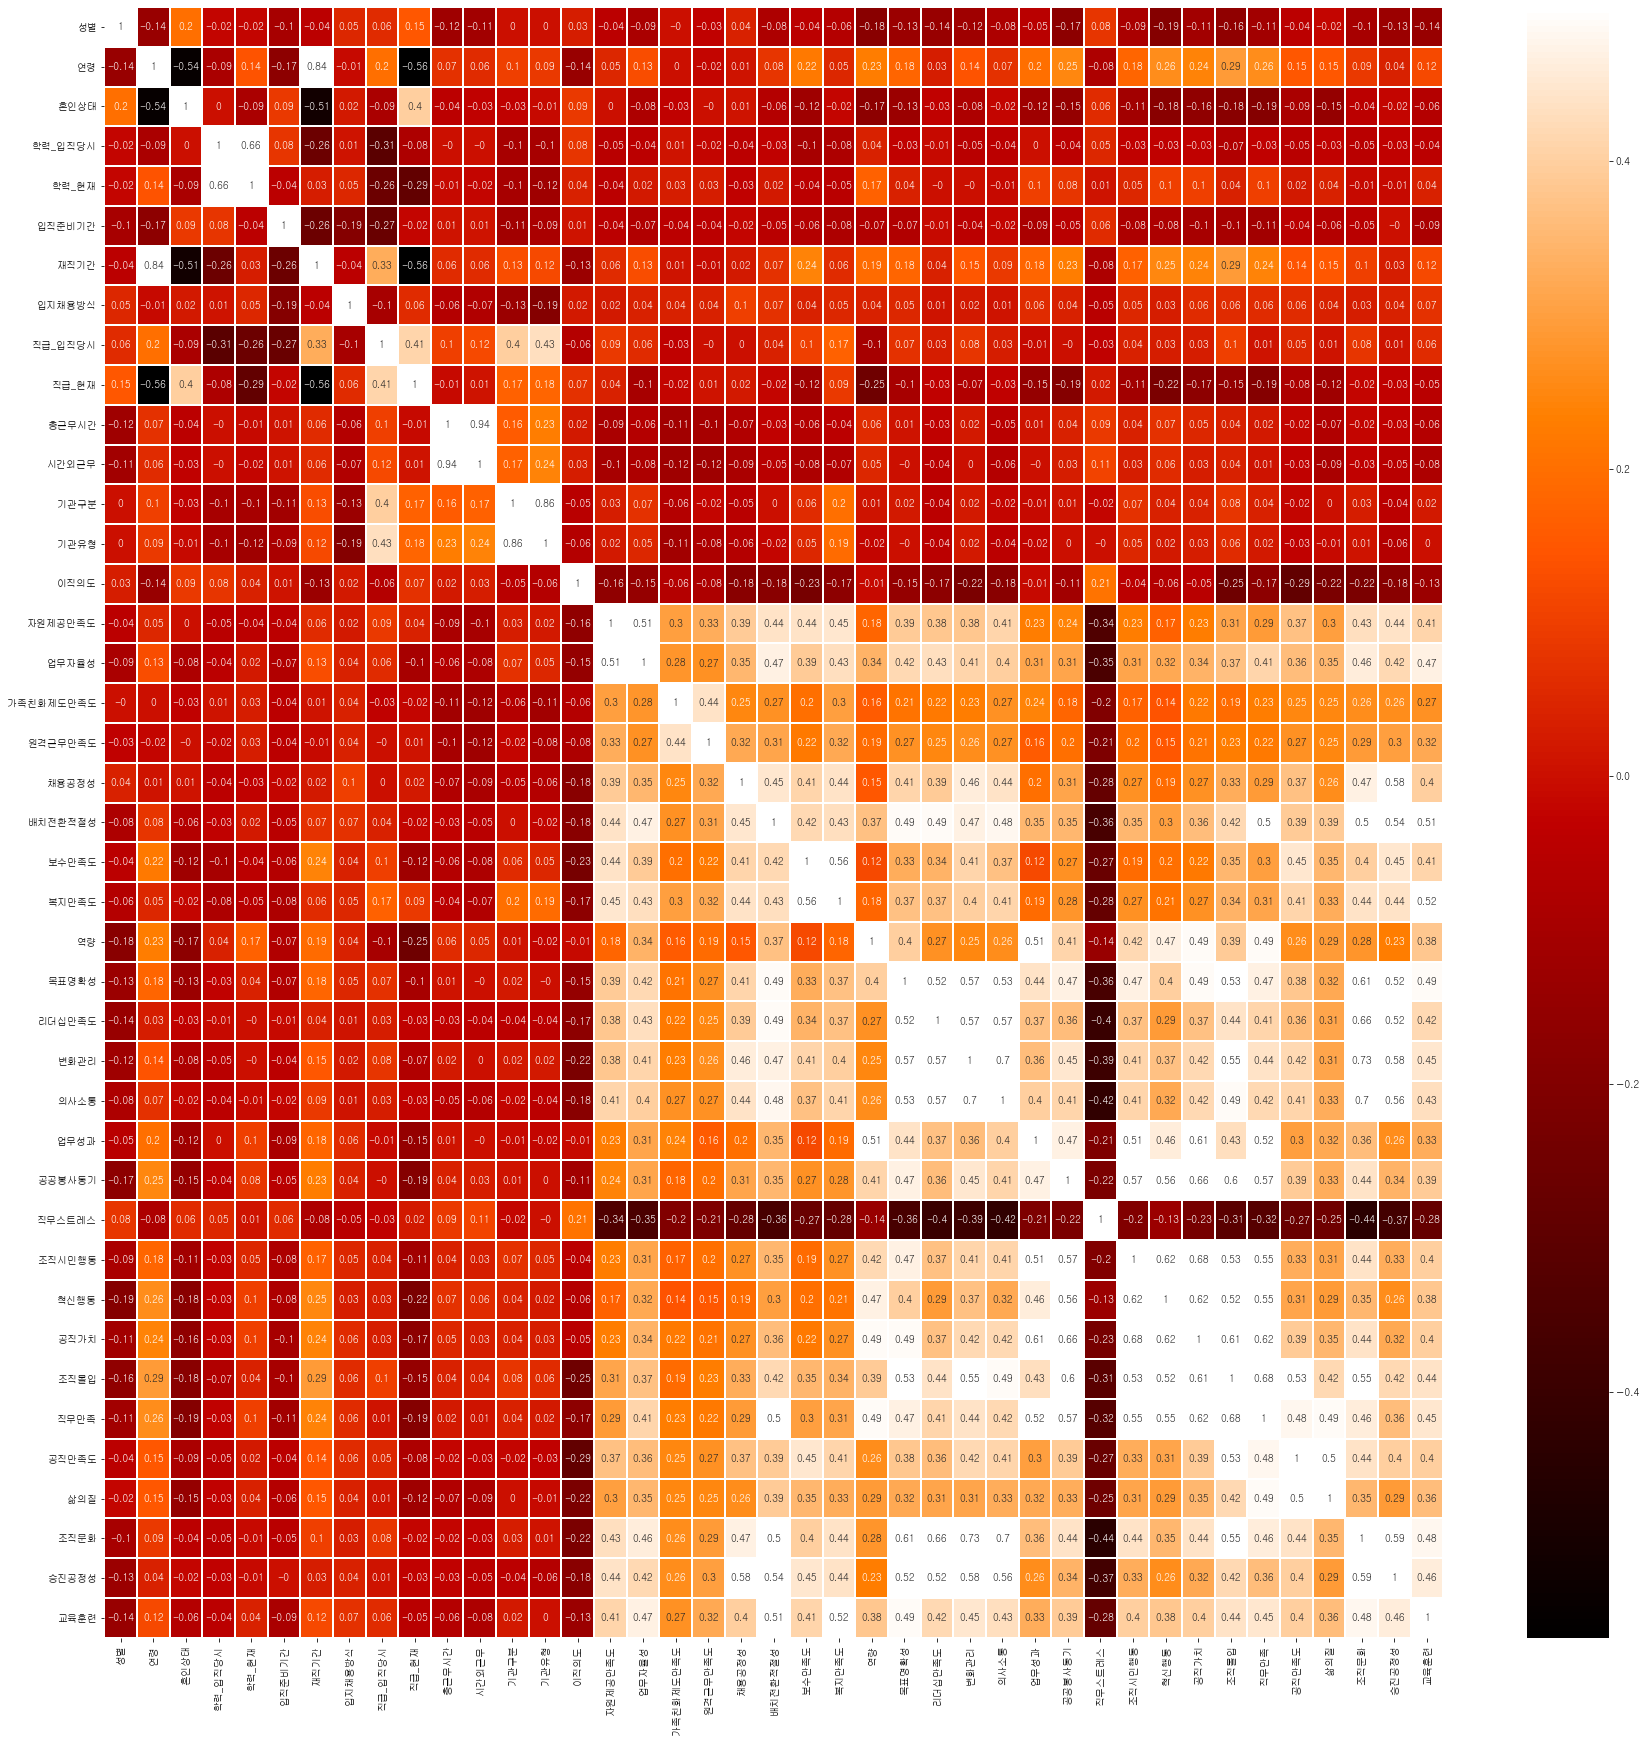

In [32]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(method='pearson').round(2),linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white',annot=True)

In [33]:
# sns.pairplot(df)

## 결측값
- 17  가족친화제도만족도  3002 non-null   float64
- 18  원격근무만족도    3380 non-null   float64

#### 이직의도와 상관도가 매우 적기 때문에 행 삭제로 대체 
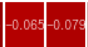

In [34]:
df.drop(["가족친화제도만족도","원격근무만족도"],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   성별       4133 non-null   int64  
 1   연령       4133 non-null   int64  
 2   혼인상태     4133 non-null   int64  
 3   학력_입직당시  4133 non-null   int64  
 4   학력_현재    4133 non-null   int64  
 5   입직준비기간   4133 non-null   int64  
 6   재직기간     4133 non-null   int64  
 7   입지채용방식   4133 non-null   int64  
 8   직급_입직당시  4133 non-null   int64  
 9   직급_현재    4133 non-null   int64  
 10  총근무시간    4133 non-null   int64  
 11  시간외근무    4133 non-null   int64  
 12  기관구분     4133 non-null   int64  
 13  기관유형     4133 non-null   int64  
 14  이직의도     4133 non-null   int64  
 15  자원제공만족도  4133 non-null   float64
 16  업무자율성    4133 non-null   float64
 17  채용공정성    4133 non-null   float64
 18  배치전환적절성  4133 non-null   float64
 19  보수만족도    4133 non-null   float64
 20  복지만족도    4133 non-null   float64
 21  역량       4133 

## 이직의도 상관

In [58]:
corrdf = df.corr(method='pearson')

corrdf_sort = pd.DataFrame(corrdf['이직의도'].sort_values(ascending =True))
ddcc = corrdf['이직의도'].sort_values(ascending =True)

In [59]:
dcc = ddcc.abs()
dcc.sort_values(ascending =True)

역량         0.006474
업무성과       0.010641
입직준비기간     0.014244
총근무시간      0.021069
입지채용방식     0.022272
시간외근무      0.025567
성별         0.033382
조직시민행동     0.043991
학력_현재      0.044725
공직가치       0.049528
기관구분       0.054504
혁신행동       0.055081
기관유형       0.055768
직급_입직당시    0.058406
직급_현재      0.067511
학력_입직당시    0.076358
혼인상태       0.090045
공공봉사동기     0.108955
교육훈련       0.128355
재직기간       0.128778
연령         0.137361
목표명확성      0.149744
업무자율성      0.152509
자원제공만족도    0.159243
복지만족도      0.167082
리더십만족도     0.170696
직무만족       0.171831
의사소통       0.175164
채용공정성      0.176394
배치전환적절성    0.183208
승진공정성      0.184975
직무스트레스     0.209536
변화관리       0.215786
삶의질        0.218910
조직문화       0.222636
보수만족도      0.234939
조직몰입       0.246580
공직만족도      0.293753
이직의도       1.000000
Name: 이직의도, dtype: float64

#### 이직의도와 직무스트레스 서로의 상관관계가 높음을 확인

In [60]:
df['이직의도'].value_counts()

0    2679
1    1454
Name: 이직의도, dtype: int64

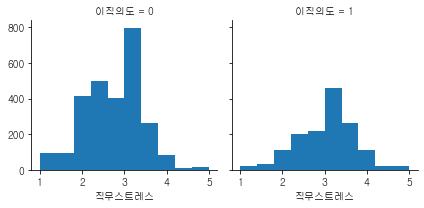

In [61]:
grid = sns.FacetGrid(df, col='이직의도')
grid.map(plt.hist,'직무스트레스',bins=10)
plt.show()

- 이직의도=0은 2679명 / 이직의도=1은 1454명
- 이직의도=1 인원수가 더 적음에도 직무스트레스 3,4,5는 이직의도=0과 비슷하거나 조금 더 많음을 볼 수 있음

# 모델링

In [62]:
df1 = df.drop(["이직의도"],axis=1)

- x 값 = 설문조사 정보
- y 값 = 이직의도

In [63]:
x = np.array(df1)
y = np.array(df['이직의도'])

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (3306, 38)
test shape: (827, 38)


# 오토케라스

In [71]:
# AutoKeras 모델 구성
clf = ak.StructuredDataClassifier(max_trials=10)

# 모델 학습
clf.fit(x_train, y_train, epochs=10)

# 검증용 데이터로 모델 평가
loss, accuracy = clf.evaluate(x_test, y_test)

# 성능 출력
print('Accuracy: %.2f%%' % (accuracy*100))

Trial 10 Complete [00h 00m 11s]
val_accuracy: 0.655339777469635

Best val_accuracy So Far: 0.6812297701835632
Total elapsed time: 00h 01m 12s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 0.6688 - accuracy: 0.6065
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.6549
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6703
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 0.6045 - accuracy: 0.6824
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6933
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.6942
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7018
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7145
Epoch 9/10
104/104 [

In [72]:
loss

0.630592942237854

In [73]:
clf.predict(x_train[:10]).round(2)

1/1 [==============================] - 0s 10ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [74]:
y_test[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

#### loss : sparse_categorical_crossentropy
- 범주형 교차 엔트로피와 동일하게 멀티 클래스 분류에 사용
- one-hot encoding 된 상태일 필요 없이 정수 인코딩 된 상태에서 수행 가능
- 라벨이 (1,2,3,4) 이런식으로 정수형태일때 사용

Epoch 1/100
331/331 [==============================] - 1s 2ms/step - loss: 0.6390 - accuracy: 0.6594 - val_loss: 0.5983 - val_accuracy: 0.6856
Epoch 2/100
331/331 [==============================] - 0s 1ms/step - loss: 0.5995 - accuracy: 0.6954 - val_loss: 0.5840 - val_accuracy: 0.7243
Epoch 3/100
331/331 [==============================] - 0s 1ms/step - loss: 0.5900 - accuracy: 0.6978 - val_loss: 0.5765 - val_accuracy: 0.7170
Epoch 4/100
331/331 [==============================] - 0s 1ms/step - loss: 0.5766 - accuracy: 0.7075 - val_loss: 0.5687 - val_accuracy: 0.7195
Epoch 5/100
331/331 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.7060 - val_loss: 0.5811 - val_accuracy: 0.7086
Epoch 6/100
331/331 [==============================] - 1s 2ms/step - loss: 0.5745 - accuracy: 0.7063 - val_loss: 0.5755 - val_accuracy: 0.7219
Epoch 7/100
331/331 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.7139 - val_loss: 0.5709 - val_accuracy: 0.7170

[Text(0.5, 1.0, 'model loss'), Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss')]

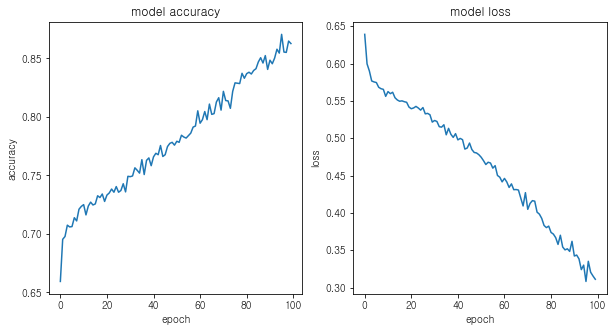

In [43]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(39, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(39, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=100 , batch_size=10, 
                    validation_data=(x_test, y_test), validation_freq=1)

#그래프
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10, 5))

# 모델의 정확도를 그립니다.
ax0.plot(history.history['accuracy']) 
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

# 모델의 오차를 그립니다.
ax1.plot(history.history['loss'])
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')


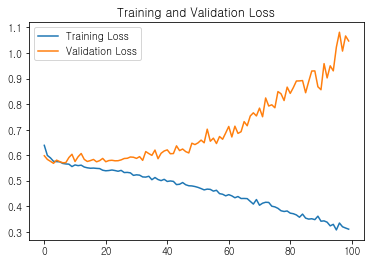

In [44]:
plt.close()
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.close()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [45]:
score = model.evaluate(x_train,y_train, verbose=1)
print('정답률 = ', score[1],'loss=', score[0])

104/104 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8829
정답률 =  0.8829401135444641 loss= 0.27565890550613403


## test 데이터 예측

In [46]:
model.predict(x_train[:10]).round(2)

1/1 [==============================] - 0s 59ms/step


array([[0.14, 0.93],
       [0.36, 0.28],
       [0.78, 0.34],
       [0.82, 0.2 ],
       [0.09, 0.9 ],
       [0.79, 0.12],
       [0.69, 0.36],
       [0.8 , 0.33],
       [0.37, 0.56],
       [0.04, 0.76]], dtype=float32)

In [47]:
y_test[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [48]:
# plt.figure(figsize=(30,30))
# sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white',annot=True)
# plt.show()

# plt.savefig("C:/Users/kowm6/OneDrive/바탕 화면/상관도.png")